In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, jaccard_score, f1_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

In [2]:
def load_data(file_path):
    # Load data from CSV file
    return pd.read_csv(file_path)

In [3]:
def visualize_data(data):
    # Scatter plots for different features and stress levels
    colors = {'low': 'red', 'high': 'green', 'mid': 'yellow'}
    
    plt.scatter(data['Humidity'], data['Temperature'], c=data['Stress_Level'].map(colors))
    plt.legend(handles=[mpatches.Patch(color='green', label='high'), 
                        mpatches.Patch(color='yellow', label='mid'), 
                        mpatches.Patch(color='red', label='low')])
    plt.xlabel("Humidity")
    plt.ylabel("Temperature")
    plt.show()

    plt.scatter(data['Humidity'], data['Step_count'], c=data['Stress_Level'].map(colors))
    plt.legend(handles=[mpatches.Patch(color='green', label='high'), 
                        mpatches.Patch(color='yellow', label='mid'), 
                        mpatches.Patch(color='red', label='low')])
    plt.xlabel("Humidity")
    plt.ylabel("Step_count")
    plt.show()

    plt.scatter(data['Temperature'], data['Step_count'], c=data['Stress_Level'].map(colors))
    plt.legend(handles=[mpatches.Patch(color='green', label='high'), 
                        mpatches.Patch(color='yellow', label='mid'), 
                        mpatches.Patch(color='red', label='low')])
    plt.xlabel("Temperature")
    plt.ylabel("Step_count")
    plt.show()

In [4]:
def train_test_split_data(data, test_size):
    # Split data into training and testing sets
    return train_test_split(data.drop('Stress_Level', axis=1), data['Stress_Level'], test_size=test_size, random_state=42)

In [5]:
def train_logistic_regression(x_train, y_train):
    # Create a logistic regression model
    model = LogisticRegression()
    
    # Create a OneVsRestClassifier and fit it with the training data
    ovr = OneVsRestClassifier(model)
    ovr.fit(x_train, y_train)
    
    return ovr

In [6]:
def evaluate_model(model, x_test, y_test):
    # Make predictions and evaluate the model
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    return y_pred, accuracy, confusion, jaccard, f1

In [7]:
def plot_roc_curve(y_test, y_score, n_classes):
    # Plot ROC curve for multi-class data
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    colors = cycle(['blue', 'red', 'green'])
    
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multi-class Data')
    plt.legend(loc="lower right")
    plt.show()

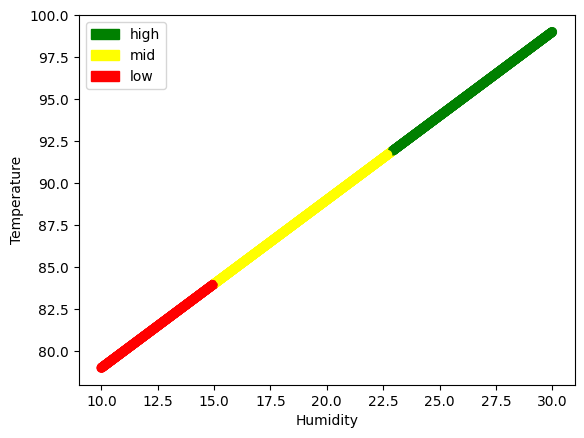

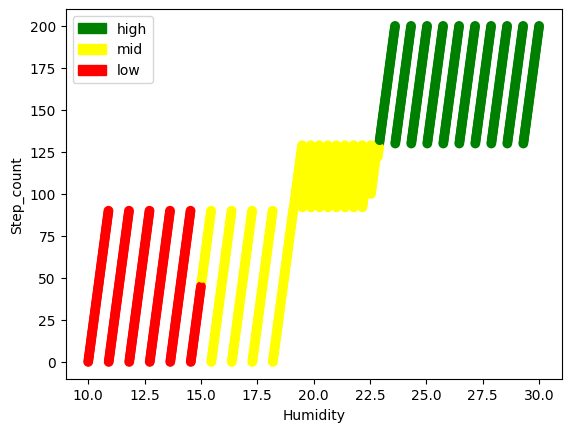

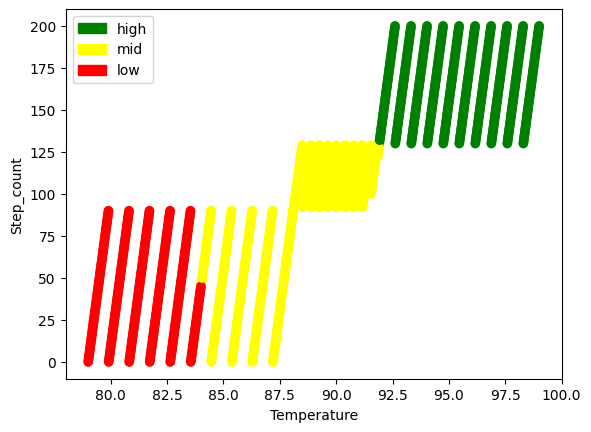

In [8]:
# Load and visualize data
data = load_data('data/Stress-Lysis.csv')
visualize_data(data)

In [9]:
# Split data into training and testing sets for multi-class classification
x_train, x_test, y_train, y_test = train_test_split(data.drop('Stress_Level', axis=1), data['Stress_Level'], test_size=0.8, random_state=0)

In [10]:
# Train logistic regression model for multi-class classification
model = train_logistic_regression(x_train, y_train)

In [11]:
# Evaluate the model
y_pred, accuracy, confusion, jaccard, f1 = evaluate_model(model, x_test, y_test)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Jaccard Score:", jaccard)
print("F1 Score:", f1)

Accuracy: 0.9975015615240475
Confusion Matrix:
 [[576   0   0]
 [  0 392   1]
 [  3   0 629]]
Jaccard Score: 0.9950155763239875
F1 Score: 0.9975015615240475


In [12]:
# Perform label binarization for multi-class data
y = label_binarize(data['Stress_Level'], classes=['low', 'mid', 'high'])
n_classes = y.shape[1]

In [13]:
# Split data into training and testing sets for multi-class classification
x_train, x_test, y_train, y_test = train_test_split(data.drop('Stress_Level', axis=1), y, test_size=0.8, random_state=0)

In [14]:
# Train logistic regression model for multi-class classification
model = train_logistic_regression(x_train, y_train)

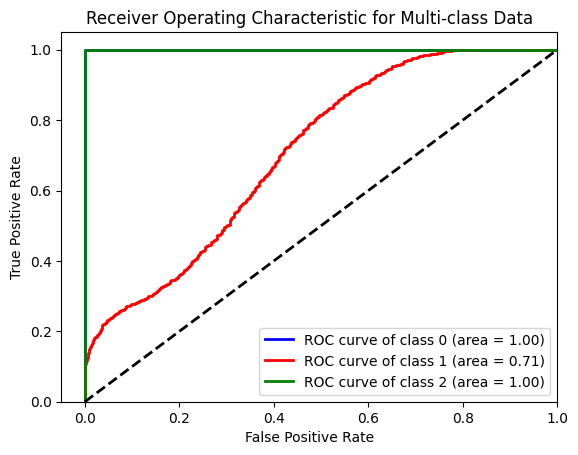

In [15]:
# Get decision function scores for ROC curve
y_score = model.decision_function(x_test)

# Plot ROC curve for multi-class data
plot_roc_curve(y_test, y_score, n_classes)
